In [17]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [241]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [242]:
housing = housing.reset_index(drop = True)

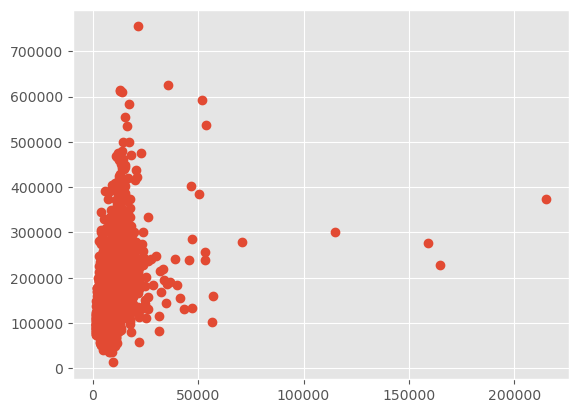

In [295]:
plt.plot(housing.LotArea, housing.SalePrice, 'o')

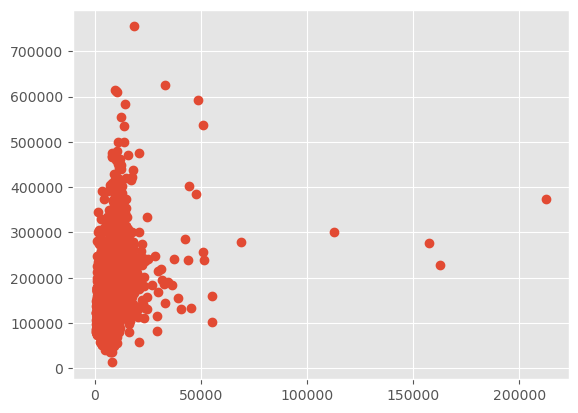

In [294]:
plt.plot(housing['LotArea'] -(housing['1stFlrSF'] + housing['GarageArea']), housing['SalePrice'], 'o')

In [254]:
housing['LotArea'] -(housing['1stFlrSF'] + housing['GarageArea'])

0        6635.0
1        2920.0
2        4843.0
3        7148.0
4        7062.0
5        6134.0
6        4488.0
7        2036.0
8       11022.0
9        2078.0
10       4348.0
11       9275.0
12       6255.0
13       7592.0
14       7067.0
15       7120.0
16       7032.0
17       7384.0
18       8513.0
19       6186.0
20       5389.0
21       4961.0
22        931.0
23       9516.0
24        835.0
25      12142.0
26       6849.0
27        908.0
28       8791.0
29      12507.0
         ...   
2550     7366.0
2551    10342.0
2552     8070.0
2553    11478.0
2554     7083.0
2555     6731.0
2556     8224.0
2557     9568.0
2558    10027.0
2559     8012.0
2560     1014.0
2561     7921.0
2562     6653.0
2563     6827.0
2564     8261.0
2565     2767.0
2566    24312.0
2567     5560.0
2568     6236.0
2569     8228.0
2570     9776.0
2571     7252.0
2572    16230.0
2573     7494.0
2574     5740.0
2575     7710.0
2576    11495.0
2577     4398.0
2578     7355.0
2579     8018.0
Length: 2580, dtype: flo

In [251]:
housing[['LotArea','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea']]

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea
0,7890,856,0,856,399.0
1,4235,1049,0,1049,266.0
2,6060,1001,0,1001,216.0
3,8146,717,322,1039,281.0
4,8400,810,855,1665,528.0
5,7301,495,1427,1922,672.0
6,6000,936,0,936,576.0
7,3710,1246,0,1246,428.0
8,12395,889,0,889,484.0
9,3675,1072,0,1072,525.0


Start by checking for repeated values and missing values 

In [147]:
housing.PID.value_counts()
#need to check and make sure this PID represents the same sale before dropping it 

PID
909276070    2
909176150    1
528292070    1
909250220    1
534450150    1
528290190    1
902109080    1
527453010    1
903430130    1
902206040    1
533223080    1
923203100    1
535153140    1
528221070    1
533352150    1
528327060    1
528354060    1
905452040    1
527425035    1
535457070    1
535176100    1
911370540    1
534276160    1
528172080    1
528172050    1
528344100    1
905226130    1
907135180    1
907180050    1
909252020    1
            ..
907410040    1
907227080    1
531384070    1
528290170    1
903457130    1
902402250    1
533223050    1
527376090    1
528168040    1
532376090    1
535478040    1
916403290    1
535453100    1
528327070    1
535453040    1
923276180    1
534430110    1
907187030    1
535383120    1
902205070    1
528488100    1
914478045    1
534403370    1
535455080    1
532479120    1
531452260    1
528488130    1
923229010    1
528382020    1
906223180    1
Name: count, Length: 2579, dtype: int64

In [148]:
housing.loc[housing.PID == 909276070]
# it is the exact same sale so we can drop it and comfirmed by drop duplicates 

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1816,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [149]:
housing = housing.drop_duplicates()
housing.PID.value_counts()

PID
909176150    1
923203100    1
909250220    1
534450150    1
528290190    1
902109080    1
527453010    1
903430130    1
902206040    1
528292070    1
533223080    1
535153140    1
528221070    1
533352150    1
528327060    1
528354060    1
905452040    1
527425035    1
535455060    1
535457070    1
535176100    1
911370540    1
534276160    1
528172080    1
528172050    1
528344100    1
905226130    1
907135180    1
907180050    1
909252020    1
            ..
907410040    1
907227080    1
531384070    1
528290170    1
903457130    1
902402250    1
533223050    1
527376090    1
528168040    1
532376090    1
535478040    1
916403290    1
535453100    1
528327070    1
535453040    1
923276180    1
534430110    1
907187030    1
535383120    1
902205070    1
528488100    1
914478045    1
534403370    1
535455080    1
532479120    1
531452260    1
528488130    1
923229010    1
528382020    1
906223180    1
Name: count, Length: 2579, dtype: int64

In [150]:
mask = housing.isnull().any(axis = 1)
housing.loc[mask,:]
# every single row has missing values 
# we will deal with this after converting some of the data
# because categorical vs numerical will be filled in differently 

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
7,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
8,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
9,908186050,1072,140000,180,RM,35.0,3675,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


## Check relationships among numerical and categorical variables and sales price 
- Some numerical will be converted to categorical 
- some categorical will be converted to numerical if the number of items has meaning...for example the number of bathrooms 
- many of these conversions were done with similar code to https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Modelling 


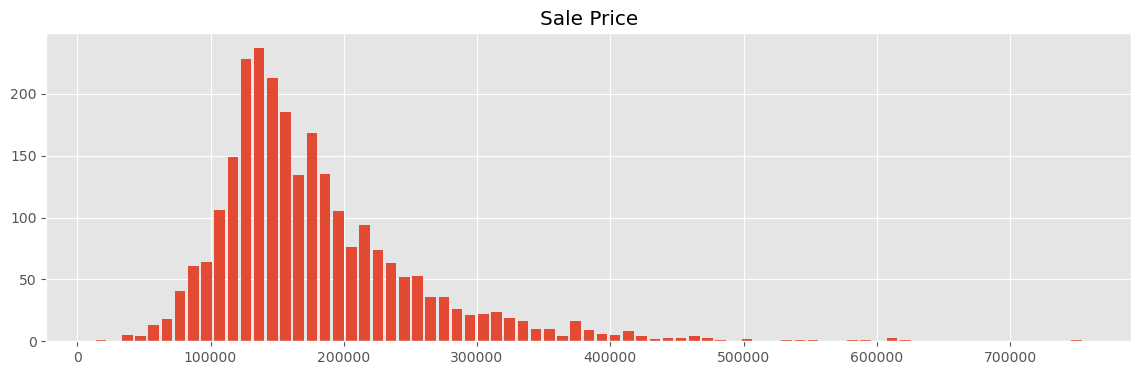

In [151]:
# Sales price is skewed right so it will need a transformation 
housing.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('Sale Price')
plt.show()

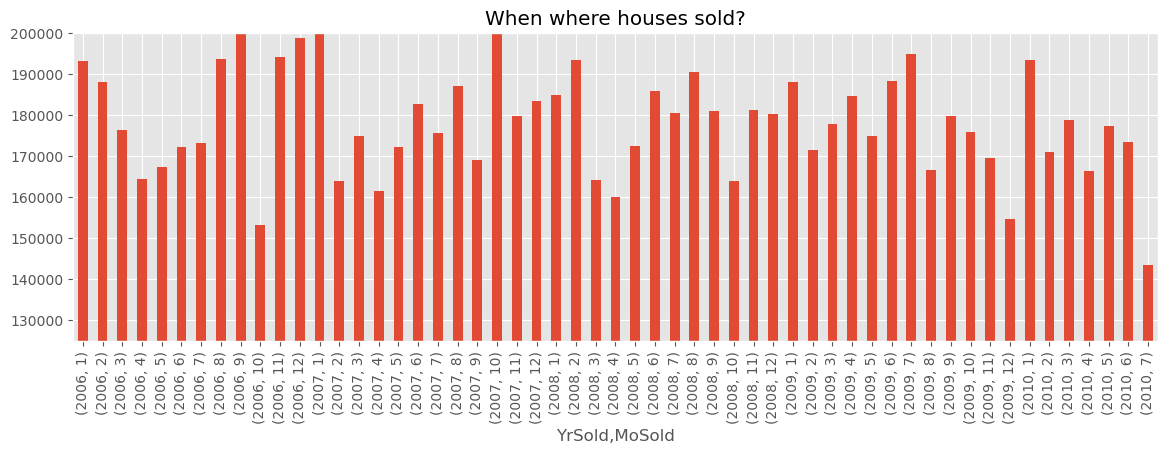

In [50]:
# the relationship between sales price and month and year sold is a categorical relationship not a numerical one 
housing.groupby(['YrSold','MoSold']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.ylim((125000,200000))
plt.show()

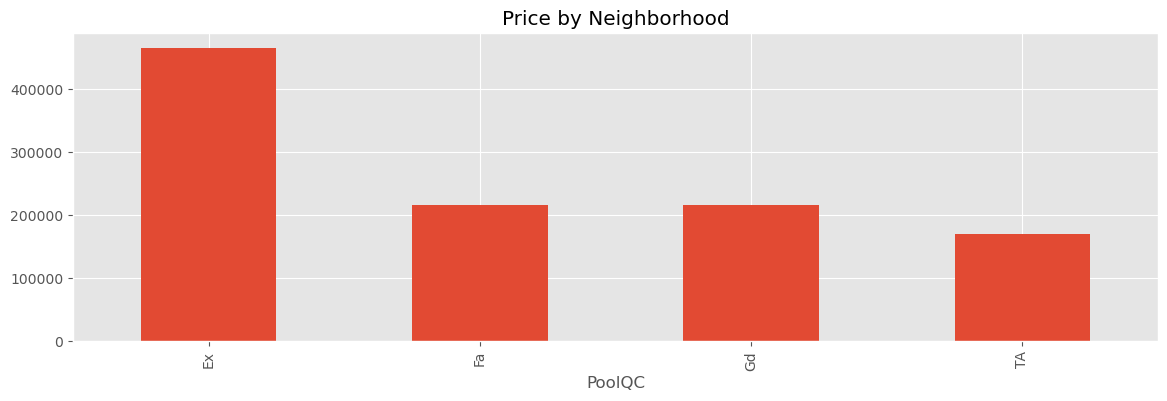

In [256]:
housing.groupby(['PoolQC']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('Price by Neighborhood')
plt.show()

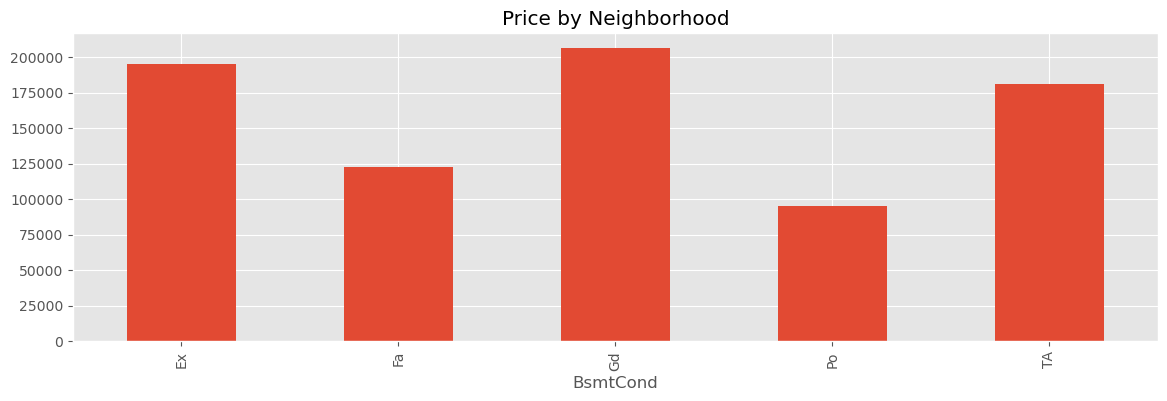

In [113]:
housing.groupby(['BsmtCond']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('Price by Neighborhood')
plt.show()

In [266]:
housing.PoolQC = housing.PoolQC.fillna(0)
housing.PoolQC.unique()

array([0, 'Ex', 'Gd', 'Fa', 'TA'], dtype=object)

In [278]:
from sklearn import linear_model 
olr = linear_model.LinearRegression()
X = pd.DataFrame(housing.PoolArea)
y = housing.SalePrice
olr.fit(X,y)
olr.score(X, y)

0.0009513780180608888

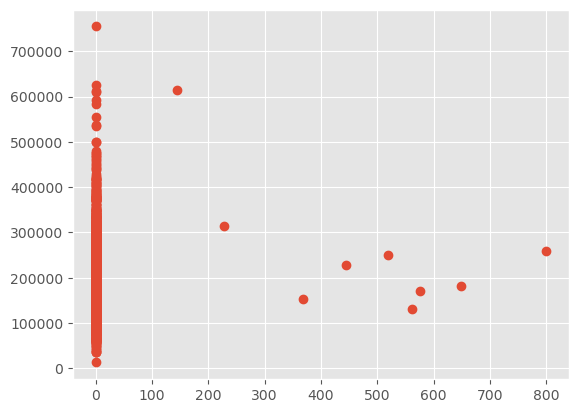

In [268]:
plt.plot(housing['PoolArea'], housing['SalePrice'], 'o')

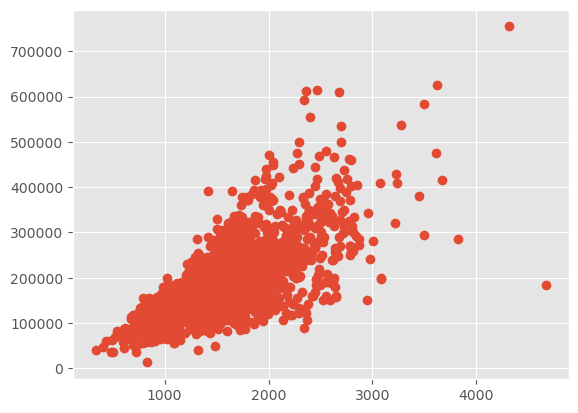

In [289]:
plt.plot(housing['GrLivArea'], housing['SalePrice'], 'o')

In [292]:
housing.loc[housing.GrLivArea > 4000, :]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,...,0,0,0,NaN,NaN,0,10,2007,New,Partial
1007,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,...,0,0,0,NaN,NaN,0,1,2007,WD,Normal


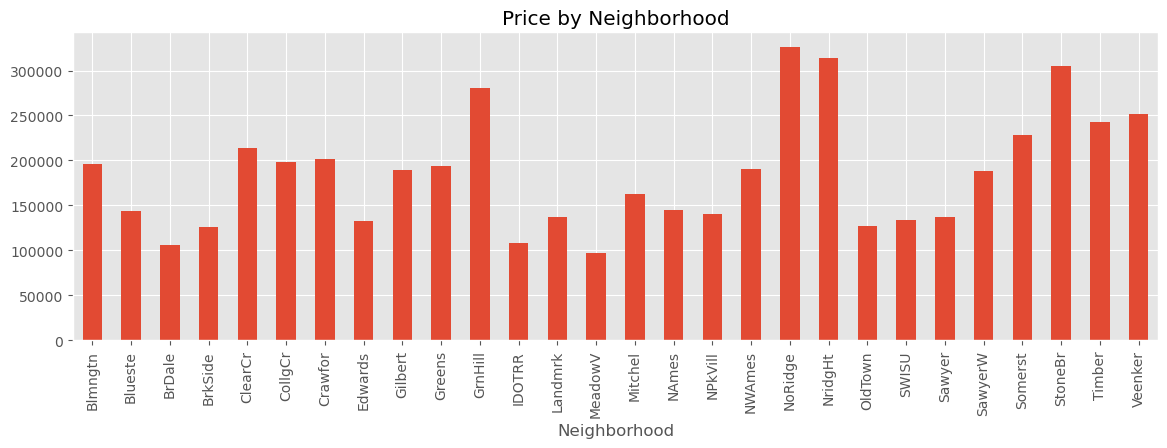

In [69]:
housing.groupby(['Neighborhood']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('Price by Neighborhood')
plt.show()

In [288]:
housing.loc[housing.GarageYrBlt == 0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


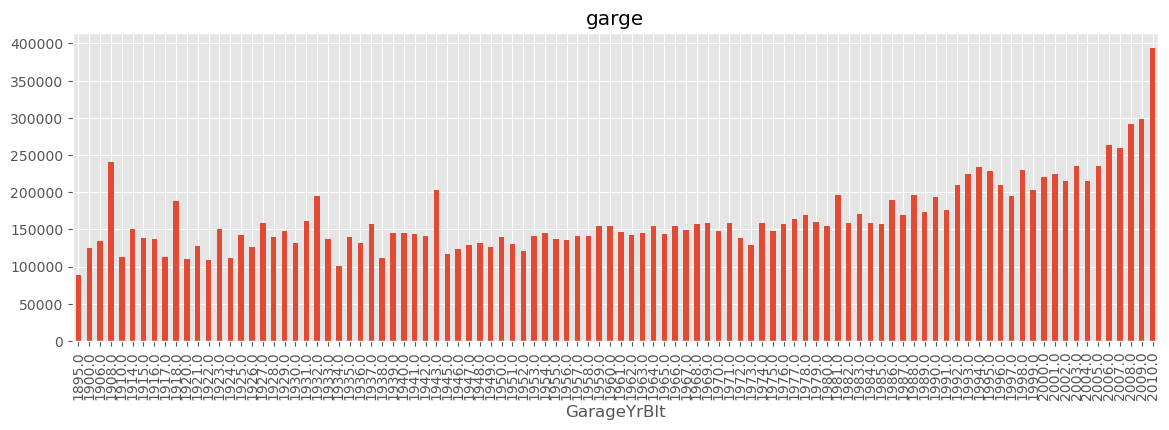

In [282]:
housing.groupby(['GarageYrBlt']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('garge')
plt.show()

Some of the numerical variables should be converted into categorical variables (object) because they do not accurately quanitfy anything. These are 'YrSold', 'MoSold', & 'MSSubclass'

## Some numerical to categorical 

In [152]:
housing = housing.astype({'YrSold': object, 'MoSold': object, 'MSSubClass': object})
housing.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [153]:
type(housing.YrSold[10])
#still showing up as integers so conver to strings 

int

In [154]:
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

In [155]:
type(housing.YrSold[10])
# now it's working and the type of the column is an object 

str

<Axes: xlabel='LandSlope'>

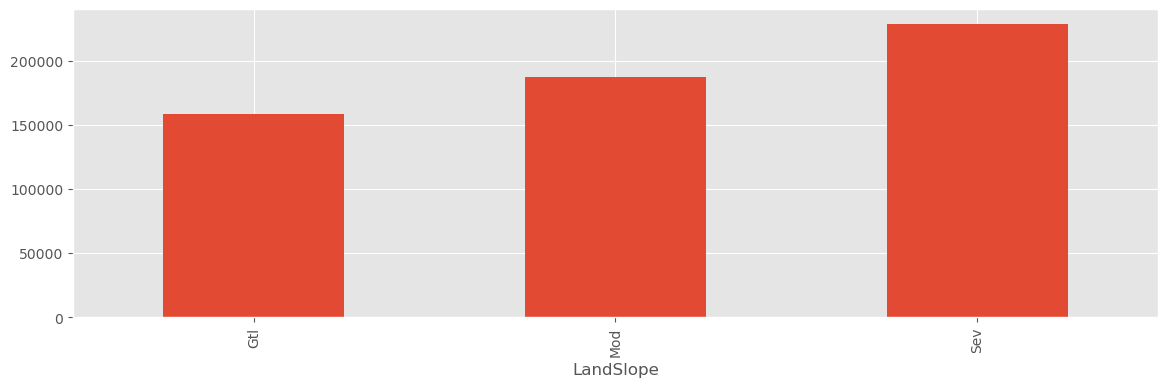

In [156]:
housing.groupby(['LandSlope']).SalePrice.median().plot(kind='bar', figsize=(14,4))

In [157]:
pd.options.display.min_rows = 200
housing.isnull().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2411
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType       1572
MasVnrArea         14
ExterQual           0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu      1241
GarageType        127
GarageYrBlt       129
GarageFinish      129
GarageCars          1
GarageArea          1
GarageQual        129
GarageCond

## Some categorical to numerical 

In [158]:
housing.RoofStyle.unique()

array(['Gable', 'Hip', 'Mansard', 'Gambrel', 'Flat', 'Shed'], dtype=object)

In [159]:
# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [160]:
housing.PoolQC.unique()

array([nan,  5.,  4.,  2.,  3.])

## Fill in na with 0 where relevant 

In [162]:
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
housing[converted_features] = housing[converted_features].fillna(0)

In [163]:
housing.PoolQC.unique()

array([0., 5., 4., 2., 3.])

In [164]:
housing.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley            float64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig         object
LandSlope          int64
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual          int64
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
FireplaceQu      float64
GarageType        object


# Fill some na with 'none' 

In [165]:
housing.isnull().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType       1572
MasVnrArea         14
ExterQual           0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType        127
GarageYrBlt       129
GarageFinish        0
GarageCars          1
GarageArea          1
GarageQual          0
GarageCond

In [126]:
missing = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'GarageType', 
           'GarageYrBlt', 'Fence', 'MiscFeature']  
for mis in missing:
    print (housing[mis].unique())

[ nan  42.  60.  80.  70.  64.  53.  74.  35.  48.  63.  62.  50.  68.
  45.  65.  21.  58.  73. 105. 100.  88.  52.  71.  76. 101.  59.  56.
  32.  78. 110.  96.  61. 108.  75. 106.  84.  67. 168.  49. 140.  66.
  92. 125.  85.  72.  24.  79. 130.  77.  94.  91.  90.  82. 149.  43.
  69.  95.  40.  51.  47.  89.  22.  38. 118.  87.  86.  54.  39.  41.
  30. 128.  46.  99.  44.  36. 107. 104.  34.  57.  81. 113. 120. 115.
 150. 116.  37. 129.  98. 121. 195. 160.  83. 102.  93.  55. 124. 131.
  33. 137. 111. 134.  26. 103. 313.  28. 114. 174. 141. 117.  25. 112.
 155. 109. 152. 153. 122.  31. 126.  97. 200. 136. 119. 135. 144. 123.
 138.]
['None' 'BrkFace' 'Stone' 'BrkCmn']
[0.000e+00 1.490e+02 5.000e+02 2.000e+01 7.600e+01 1.960e+02 2.470e+02
 1.130e+02 1.200e+02 8.000e+01 2.800e+01 1.700e+02 4.920e+02 4.400e+01
 2.160e+02 2.400e+02 4.000e+02 6.000e+01 2.980e+02 5.200e+01 2.950e+02
 1.250e+02 3.800e+02 3.600e+01 7.400e+01 1.060e+02 3.750e+02 8.800e+01
 6.510e+02 2.800e+02 2.700e+02 6.8

In [166]:
missing2 = ['MasVnrType', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing2] = housing[missing2].fillna('None')

In [167]:
housing.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 'None', '2Types',
       'CarPort'], dtype=object)

In [205]:
housing.shape

(2579, 81)

## Fill in numerical na

In [168]:
housing.isnull().sum()

PID                0
GrLivArea          0
SalePrice          0
MSSubClass         0
MSZoning           0
LotFrontage      462
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        14
ExterQual          0
                ... 
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt      129
GarageFinish       0
GarageCars         1
GarageArea         1
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF   

In [127]:
housing.LotFrontage.unique()

array([ nan,  42.,  60.,  80.,  70.,  64.,  53.,  74.,  35.,  48.,  63.,
        62.,  50.,  68.,  45.,  65.,  21.,  58.,  73., 105., 100.,  88.,
        52.,  71.,  76., 101.,  59.,  56.,  32.,  78., 110.,  96.,  61.,
       108.,  75., 106.,  84.,  67., 168.,  49., 140.,  66.,  92., 125.,
        85.,  72.,  24.,  79., 130.,  77.,  94.,  91.,  90.,  82., 149.,
        43.,  69.,  95.,  40.,  51.,  47.,  89.,  22.,  38., 118.,  87.,
        86.,  54.,  39.,  41.,  30., 128.,  46.,  99.,  44.,  36., 107.,
       104.,  34.,  57.,  81., 113., 120., 115., 150., 116.,  37., 129.,
        98., 121., 195., 160.,  83., 102.,  93.,  55., 124., 131.,  33.,
       137., 111., 134.,  26., 103., 313.,  28., 114., 174., 141., 117.,
        25., 112., 155., 109., 152., 153., 122.,  31., 126.,  97., 200.,
       136., 119., 135., 144., 123., 138.])

In [171]:
(housing.LotFrontage/housing.LotArea).mean()

0.007917988032381118

In [169]:
housing.LotFrontage.fillna((housing.LotArea*0.007917988032381118), inplace=True)

In [170]:
housing.LotFrontage.unique()

array([  62.47292558,   42.        ,   60.        ,   80.        ,
         70.        ,   64.        ,   53.        ,   74.        ,
         35.        ,   48.        ,   63.        ,   62.        ,
         75.22088631,   50.        ,   68.        ,   45.        ,
         83.95442711,   65.        ,   21.        ,   58.        ,
         73.        ,   16.76238066,   82.20455175,  105.        ,
        100.        ,   88.        ,   52.        ,   95.38008384,
         87.09786836,   71.        ,   76.        ,   68.39558062,
        101.        ,   59.        ,   56.        ,   32.        ,
         78.        ,  110.        ,   96.        ,   94.612039  ,
         61.        ,   30.32589416,  108.        ,   75.        ,
        106.        ,   96.9953534 ,   84.        ,   67.        ,
        168.        ,   49.        ,  140.        ,   57.42124921,
         56.81948212,   66.        ,   92.        ,   23.73812812,
        125.        ,   85.        ,  420.50059044,  101.12854

In [173]:
housing.MasVnrArea.fillna(0, inplace=True)

In [177]:
housing.GarageYrBlt.fillna(0, inplace=True)

In [ ]:
housing.GarageYrBlt.unique()
# I really don't want to fill this with 0 but Idk what else to do 

In [197]:
housing.isnull().sum().sort_values(ascending=False)

BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
Electrical       1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
GarageCars       1
GarageArea       1
KitchenAbvGr     0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
FullBath         0
BedroomAbvGr     0
HalfBath         0
GarageType       0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
FireplaceQu      0
GarageYrBlt      0
HeatingQC        0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
                ..
Utilities        0
LotShape         0
GrLivArea        0
Alley            0
Street           0
LotArea          0
LotFrontage      0
MSZoning         0
MSSubClass       0
SalePrice        0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual   

In [198]:
missing_again = ['BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF','Electrical','BsmtUnfSF'
                 ,'BsmtFinSF2','BsmtFinSF1','GarageCars','GarageArea']  
for mis in missing_again:
    print (housing[mis].unique())

[ 1.  0.  2.  3. nan]
[ 0.  1.  2. nan]
[ 856. 1049.  837.  405.  810.    0.  936. 1146.  864.  547. 1342.  624.
  861. 1394. 1536.  886. 1274. 1610.  384. 1461.  789.  546. 1240.  525.
  608. 1466.  756. 1107. 1994.  190. 1246. 1324.  833. 1269. 1336.  842.
  492.  848.  988. 1519. 1084. 1312.  925.  736. 1158.  847.  768.  440.
 1296. 1511.  585. 1422. 1200. 1001. 1935. 1248. 1311.  975.  432. 1726.
 1850.  894. 2535.  804. 1173. 1335. 1588. 1600.  868.  616. 1485.  815.
  816. 1128. 1256. 1120.  858.  780.  960. 1145.  928.  874.  644. 1440.
 1058.  630. 1099. 1226. 1417. 1680. 2458. 1580.  958. 2320. 1502.  689.
  970.  738.  732. 1056.  718. 1267.  728.  907.  450. 1064.  784.  684.
 2271.  808.  356. 1105. 1408. 1432. 1250.  984.  979.  799. 1277. 1052.
  836. 1626.  908.  882.  916. 1501.  943. 1978.  651.  448. 1358. 1624.
 1230.  884.  941. 1260. 1005. 1696. 1541. 1390.  793. 1330.  660.  481.
  844. 1313.  796. 2077. 1176. 1460. 1602. 1720.  912.  761. 1386.  742.
 1190.  876

In [199]:
housing.Electrical.fillna('None', inplace=True)

In [200]:
missing_features0 = ['BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF', 'BsmtUnfSF'
                 ,'BsmtFinSF2','BsmtFinSF1','GarageCars','GarageArea']
housing[missing_features0] = housing[missing_features0].fillna(0)

In [203]:
housing.isnull().sum().sum()

0

# No more nulls

In [204]:
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,62.472926,7890,Pave,0.0,1,...,166,0,0.0,None,None,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,0.0,1,...,0,0,0.0,None,None,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,0.0,1,...,0,0,0.0,None,None,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,0.0,1,...,111,0,0.0,None,None,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,0.0,1,...,0,0,0.0,None,None,0,11,2009,WD,Normal
5,908128060,1922,198500,85,RL,64.000000,7301,Pave,0.0,1,...,0,0,0.0,None,None,0,7,2009,ConLD,Normal
6,902135020,936,93000,20,RM,60.000000,6000,Pave,2.0,1,...,0,0,0.0,None,None,0,2,2009,WD,Normal
7,528228540,1246,187687,20,RL,53.000000,3710,Pave,0.0,1,...,0,0,0.0,None,None,0,3,2008,New,Partial
8,923426010,889,137500,20,RL,74.000000,12395,Pave,0.0,1,...,0,0,0.0,None,None,0,4,2008,WD,Normal
9,908186050,1072,140000,180,RM,35.000000,3675,Pave,0.0,1,...,0,0,0.0,None,None,0,5,2007,WD,Normal


### We need to standardize all the numerical values for penalized regression

need to figure out of this needs to be done before or after split into train and test data 

In [134]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [131]:
mask = (housing.dtypes == 'int64') | (housing.dtypes == 'float')
mask

PID               True
GrLivArea         True
SalePrice         True
MSSubClass        True
MSZoning         False
                 ...  
MiscVal           True
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
Length: 81, dtype: bool

In [138]:
housing.loc[:, housing.dtypes == 'object'].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [102]:
mask_front = housing.LotFrontage.isnull()
housing.loc[mask_front]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,0.0,1,...,166,0,0.0,None,None,0,3,2010,WD,Normal
13,535105100,1394,159000,20,RL,NaN,9500,Pave,0.0,2,...,185,0,0.0,None,None,0,7,2009,WD,Normal
18,534152050,1610,205000,20,RL,NaN,10603,Pave,0.0,2,...,0,0,0.0,None,None,0,2,2010,WD,Normal
27,533221090,1573,177500,160,FV,NaN,2117,Pave,0.0,1,...,0,0,0.0,None,None,0,6,2010,WD,Normal
28,534128010,2090,200000,60,RL,NaN,10382,Pave,0.0,2,...,0,0,0.0,None,Shed,350,11,2009,WD,Normal
38,527327050,2030,195000,60,RL,NaN,12046,Pave,0.0,2,...,0,0,0.0,None,None,0,6,2007,WD,Normal
40,528326110,2172,291000,60,RL,NaN,11000,Pave,0.0,1,...,0,0,0.0,None,None,0,6,2008,WD,Normal
43,532376250,925,133500,20,RL,NaN,8638,Pave,0.0,2,...,0,0,0.0,None,None,0,10,2006,WD,Normal
59,533135020,1755,235000,60,RL,NaN,11949,Pave,0.0,1,...,0,0,0.0,GdPrv,None,0,7,2009,WD,Normal
62,533213010,1726,222000,120,FV,NaN,3830,Pave,2.0,2,...,0,0,0.0,None,None,0,1,2009,New,Partial


In [99]:
missing = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'GarageType', 
           'GarageYrBlt', 'Fence', 'MiscFeature']  
for mis in missing:
    print (housing[mis].unique())

[ nan  42.  60.  80.  70.  64.  53.  74.  35.  48.  63.  62.  50.  68.
  45.  65.  21.  58.  73. 105. 100.  88.  52.  71.  76. 101.  59.  56.
  32.  78. 110.  96.  61. 108.  75. 106.  84.  67. 168.  49. 140.  66.
  92. 125.  85.  72.  24.  79. 130.  77.  94.  91.  90.  82. 149.  43.
  69.  95.  40.  51.  47.  89.  22.  38. 118.  87.  86.  54.  39.  41.
  30. 128.  46.  99.  44.  36. 107. 104.  34.  57.  81. 113. 120. 115.
 150. 116.  37. 129.  98. 121. 195. 160.  83. 102.  93.  55. 124. 131.
  33. 137. 111. 134.  26. 103. 313.  28. 114. 174. 141. 117.  25. 112.
 155. 109. 152. 153. 122.  31. 126.  97. 200. 136. 119. 135. 144. 123.
 138.]
['None' 'BrkFace' 'Stone' 'BrkCmn']
[0.000e+00 1.490e+02 5.000e+02 2.000e+01 7.600e+01 1.960e+02 2.470e+02
 1.130e+02 1.200e+02 8.000e+01 2.800e+01 1.700e+02 4.920e+02 4.400e+01
 2.160e+02 2.400e+02 4.000e+02 6.000e+01 2.980e+02 5.200e+01 2.950e+02
 1.250e+02 3.800e+02 3.600e+01 7.400e+01 1.060e+02 3.750e+02 8.800e+01
 6.510e+02 2.800e+02 2.700e+02 6.8

In [132]:
housing.loc[:,mask]

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,NaN,8854,6,6,1916,1950,...,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,NaN,13680,3,5,1955,1955,...,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,NaN,8826,7,5,2000,2000,...,486.0,193,96,0,0,0,0,0,7,2007


In [151]:
StandardScaler().fit(housing)

ValueError: could not convert string to float: 'RL'

In [136]:
# need to figure out this scaler and how to apply it to any input data 
housing.loc[:,mask] = StandardScaler().fit_transform(housing.loc[:,mask])

In [208]:
housing.to_csv('housing_pp.csv')

In [140]:
housing.SaleCondition.value_counts()

SaleCondition
Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: count, dtype: int64

0

### Some of the categorical features need to be dummified 
This should be done once all the categorical features are completed and nulls filled in appropriately

In [ ]:
# do not drop the first for tree
pd.get_dummies(housing, drop_first=1).copy()

In [ ]:
# drop first for linear 
pd.get_dummies(housing, drop_first=1).copy()

In [14]:
pd.get_dummies(housing, columns = ['YrSold']).head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,NaN,0,3,WD,Normal,False,False,False,False,True
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,0,2,WD,Normal,False,False,False,True,False
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,NaN,0,11,WD,Normal,False,True,False,False,False
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,NaN,0,5,WD,Normal,False,False,False,True,False
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,NaN,0,11,WD,Normal,False,False,False,True,False


# Split into independent and dependent variables

In [211]:
y = housing.SalePrice
X = housing.drop(['SalePrice', 'PID'], axis =1).copy()

In [237]:
y.shape

(2579, 1)

In [230]:
type(y)

pandas.core.arrays.numpy_.PandasArray

In [240]:
y.shape
y

<PandasArray>
[
[126000],
[139500],
[124900],
[114000],
[227000],
[198500],
[93000],
[187687],
[137500],
[140000],
[219500],
[136000],
[80000],
[159000],
[214000],
[163000],
[203000],
[67000],
[205000],
[131250],
[181000],
[115000],
[98000],
[265979],
[105500],
[168165],
[201000],
[177500],
[200000],
[450000],
[91300],
[173500],
[199500],
[207000],
[155000],
[220000],
[196000],
[61500],
[195000],
[129250],
[291000],
[134000],
[186000],
[133500],
[148000],
[325300],
[215000],
[131000],
[109500],
[110000],
[150000],
[193800],
[178000],
[179600],
[179000],
[140000],
[395000],
[151500],
[341000],
[235000],
[72000],
[154000],
[222000],
[390000],
[128200],
[615000],
[158000],
[254000],
[169000],
[284500],
[184500],
[210400],
[214000],
[392500],
[274725],
[156932],
[282922],
[144000],
[88000],
[67500],
[148000],
[159000],
[120000],
[134900],
[185000],
[132500],
[160500],
[165000],
[100000],
[189900],
[227875],
[111900],
[145000],
[118000],
[166000],
[148000],
[99000],
[86000],
[165000],
[2115

array([[<Axes: title={'center': '0'}>]], dtype=object)

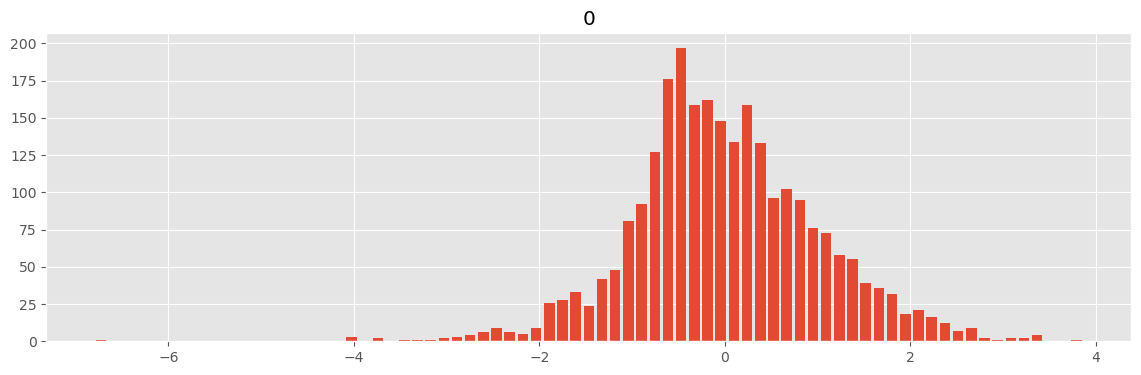

In [228]:
from sklearn.preprocessing import power_transform
y = y.reshape(-1, 1)
y_bc = power_transform(y, method = 'box-cox')
y_bc = y_bc.reshape(-1,1)
y_bc = pd.DataFrame(y_bc)
y_bc.hist(bins=75, rwidth=.8, figsize=(14,4))